---
---

### `FEATURE ENGINEERING`


In this notebook, we will first merge all the datasets that are available to us `train_data`, `product_data` and `store _data` and build a Random Forest model on it. And then, we will engineer some features from the existing datasets and try to improve the performance of the model.



---




In [1]:
# importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error as msle

---
### Read the pre-processed Datasets

We have already updated the datasets like imputing missing values, convert categorical variables into numerical ones and removed the variables with high cardinality. 

You can always try and transform the variables according to your business understanding and try to check if that is working well for you or not.


---

In [2]:
# reading the dataset
train_data = pd.read_csv('updated_dataset/updated_train_data.csv')
product_data = pd.read_csv('updated_dataset/updated_product_data.csv')
store_data = pd.read_csv('updated_dataset/updated_store_data.csv')

In [3]:
train_data.head(2)

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,0,0,20


---

***`Train Data:`***

- **WEEK_END_DATE**: Will be used to divide the data into train, validate and test.
- **STORE_NUM**: Will be used to merge files.
- **UPC**: Will be used to merge files
- **BASE_PRICE**: It was already present in the numeric form.
- **FEATURE**: It was already present in the numeric form.
- **DISPLAY**: It was already present in the numeric form.
- **UNITS**: Target Variable

---

In [4]:
product_data.head(2)

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


---

***`Product Data`***

- **UPC**: Will be used to merge files.
- **MANUFACTURER**: We have transformed the variable by One Hot Encoding.
- **CATEGORY**: We have transformed the variable by One Hot Encoding.
- **SUB_CATEGORY**: We have transformed the variable the variable by One Hot Encoding.
- **PRODUCT_SIZE**: It was initially available as different size units for different categories of products, like `PRETZELS` were available in `Ounces (OZ)` and `MOUTHWASH` were in `MILI LITRES (ML)`. So we defined the bining according the product category and transformed this feature. 

---

In [5]:
store_data.head(2)

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,46073,24767


In [6]:
store_data.columns

Index(['STORE_ID', 'ADDRESS_STATE_PROV_CODE_1', 'ADDRESS_STATE_PROV_CODE_2',
       'ADDRESS_STATE_PROV_CODE_3', 'ADDRESS_STATE_PROV_CODE_4', 'MSA_CODE_1',
       'MSA_CODE_2', 'MSA_CODE_3', 'MSA_CODE_4', 'MSA_CODE_5', 'MSA_CODE_6',
       'MSA_CODE_7', 'MSA_CODE_8', 'MSA_CODE_9', 'SEG_VALUE_NAME',
       'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS'],
      dtype='object')

---
***`Store Data`***

- **STORE_ID**: Will be used to merge files.
- **ADDRESS_STATE_PROV_CODE**: We have transformed the variable by One Hot Encoding.
- **MSA_CODE**: We have transformed the variable by One Hot Encoding.
- **SEG_VALUE_NAME**: We have transformed the variable by One Hot Encoding.
- **SALES_AREA_SIZE_NUM**:  No changes done to this variable, already present in the numeric form.
- **AVG_WEEKLY_BASKETS**: No changes done to this variable, already present in the numeric form.

---

---
---

### `MERGE ALL THE DATASET`

---

In [7]:
merged_data = train_data.merge(product_data, how= 'left', on= 'UPC')
merget_data = merged_data.merge(store_data,how='left', left_on = 'STORE_NUM', right_on='STORE_ID')

In [8]:
merged_data.head(2)

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,14-Jan-09,367,1111009477,1.57,0,0,13,1,0,0,...,0,0,1,0,0,0,0,0,0,2
1,14-Jan-09,367,1111009497,1.39,0,0,20,1,0,0,...,0,0,1,0,0,0,0,0,0,2


In [9]:
merged_data.columns

Index(['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'BASE_PRICE', 'FEATURE', 'DISPLAY',
       'UNITS', 'MANUFACTURER_1', 'MANUFACTURER_2', 'MANUFACTURER_3',
       'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6', 'MANUFACTURER_7',
       'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1', 'CATEGORY_2',
       'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1', 'SUB_CATEGORY_2',
       'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5', 'SUB_CATEGORY_6',
       'SUB_CATEGORY_7', 'PRODUCT_SIZE'],
      dtype='object')

---

So, we have now 28 columns in the merged dataset, We will drop `WEEK_END_DATE`, `STORE_NUM` and `UPC` and train the model on rest of the features with `UNITS` as the target variable.

Initially, we will train and check the performance using the 24 features. 

---

---

- ***The `WEEK_END_DATE` needs to be converted into datetime format.***
- ***In the validation strategy notebook, we have defined some functions to create the validation sets dataframe. we are going to use the same function here in this notebook also.***


In [10]:
# convert to datetime
merged_data.WEEK_END_DATE = pd.to_datetime(merged_data.WEEK_END_DATE)

# create an array of unique week dates
week = merged_data.WEEK_END_DATE.unique()

In [11]:
from datetime import timedelta
def validation_df(data, week, no_of_months, no_of_validation):
    
    model_set = []
    set_n = 1
    for w in range(len(week)-1,0,-1):
        x_data = {}

        x_data['train_start'] = week[w-3-4*no_of_months]
        x_data['train_end'] = week[w-4]
        x_data['validate_week'] = week[w-2]
        x_data['test_week'] = week[w]
        x_data['no_days_train'] = x_data['train_end'] - x_data['train_start']
        x_data['set_no'] = 'set'+str(set_n)
        set_n +=1
        model_set.append(x_data)
        if(len(model_set) == no_of_validation):
            break
        
        
    datapoints = []

    for s in model_set :
        x = {}
        train_set = data[(data.WEEK_END_DATE >= s['train_start']) & (data.WEEK_END_DATE <= s['train_end'])]
        x['train_shape'] = train_set.shape[0]
        x['validation_shape']  = data[data.WEEK_END_DATE == s['validate_week']].shape[0]
        x['test_shape'] = data[data.WEEK_END_DATE == s['test_week']].shape[0]
        x.update(s)
        datapoints.append(x)

    df = pd.DataFrame.from_dict(datapoints)
    df['no_days_train'] = df['no_days_train'] + timedelta(days=7)
    return df    

In [12]:
validation_df(merged_data, week, no_of_months=2, no_of_validation=14)

,train_shape,validation_shape,test_shape,train_start,train_end,validate_week,test_week,no_days_train,set_no
0,13089,1640,1642,2011-07-13,2011-08-31,2011-09-14,2011-09-28,56 days,set1
1,13102,1632,1638,2011-07-06,2011-08-24,2011-09-07,2011-09-21,56 days,set2
2,13101,1629,1640,2011-06-29,2011-08-17,2011-08-31,2011-09-14,56 days,set3
3,13101,1640,1632,2011-06-22,2011-08-10,2011-08-24,2011-09-07,56 days,set4
4,13109,1638,1629,2011-06-15,2011-08-03,2011-08-17,2011-08-31,56 days,set5
5,13108,1631,1640,2011-06-08,2011-07-27,2011-08-10,2011-08-24,56 days,set6
6,13108,1640,1638,2011-06-01,2011-07-20,2011-08-03,2011-08-17,56 days,set7
7,13112,1637,1631,2011-05-25,2011-07-13,2011-07-27,2011-08-10,56 days,set8
8,13104,1635,1640,2011-05-18,2011-07-06,2011-07-20,2011-08-03,56 days,set9
9,13101,1639,1637,2011-05-11,2011-06-29,2011-07-13,2011-07-27,56 days,set10


In [13]:
# function to calculate the root mean squared log error
def get_msle(true, predicted) :
    return np.sqrt(msle(true, predicted))

# function to return the columns on which the model is trained
def get_colums(data):
    print('\n####### The model is trained on Following Columns: ###########\n')
    print(data.columns)
    print('===============================================================')


# function to train the model 
# it will calculate and return the RMSLE on train and validation set    
def my_model(train_d, validate_d, model):    
    train_x = train_d.drop(columns=['WEEK_END_DATE', 'UNITS'])
    train_y = train_d['UNITS']
    
    valid_x = validate_d.drop(columns=['WEEK_END_DATE', 'UNITS'])
    valid_y = validate_d['UNITS']
    
    model.fit(train_x, train_y)
    
    predict_train = model.predict(train_x)
    predict_train = predict_train.clip(min=0)
            
    predict_validate = model.predict(valid_x)
    predict_validate = predict_validate.clip(min=0)
    
    return get_msle(train_y, predict_train), get_msle(valid_y, predict_validate), train_x
    
    
    
# function will extract the train and validation set using validation set dataframe
# The defined model will train on each of the set and the average RMSLE on train and validate set will be returned
def train_model(df, data, model):
    
    model_results_train = []
    model_results_valid = []
    for row in tqdm_notebook(range(df.shape[0]),leave=False, desc='training_model'):
        
        row = df.iloc[row]
        train_set = data[(data.WEEK_END_DATE >= row['train_start']) & (data.WEEK_END_DATE <= row['train_end'])]
        validate_set = data[data.WEEK_END_DATE == row['validate_week']]        
        train, valid, data_train = my_model(train_set,validate_set, model)
        model_results_train.append(train)
        model_results_valid.append(valid)
        
    return np.mean(model_results_train) , np.mean(model_results_valid), data_train

---

![](images/architecture1.png)

---

---
---





### `OPTIMUM VALUE OF N_ESTIMATORS`


- First of all, we will calculate the performance of the model using the default features and we will try to tune the parameters to get the best results.

- So, first we will find out the optimal value of n_estimators for the Random Forest Model and we will see the performance of the model on n_estimators value 5, 15, 25..... 245.

---

In [14]:
estimator_results = []
data = merged_data.drop(columns=['STORE_NUM', 'UPC'])


valid_df = validation_df(merged_data, week, no_of_months=2, no_of_validation= 14)

for estimator in tqdm_notebook(range(5,250,10),leave=True, desc= 'estimator'):    
    result = {}
    model_RFR = RandomForestRegressor(n_estimators= estimator, random_state=0)
    rmsle_train, rmsle_valid, data_train = train_model(valid_df, data, model_RFR)
    result['estimator'] = estimator
    result['rmsle_train'] = rmsle_train
    result['rmsle_valid'] = rmsle_valid
    estimator_results.append(result)
    
get_colums(data_train)

estimator:   0%|          | 0/25 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]


####### The model is trained on Following Columns: ###########

Index(['BASE_PRICE', 'FEATURE', 'DISPLAY', 'MANUFACTURER_1', 'MANUFACTURER_2',
       'MANUFACTURER_3', 'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6',
       'MANUFACTURER_7', 'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1',
       'SUB_CATEGORY_2', 'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5',
       'SUB_CATEGORY_6', 'SUB_CATEGORY_7', 'PRODUCT_SIZE'],
      dtype='object')


In [15]:
x = pd.DataFrame.from_dict(estimator_results)

In [16]:
x

,estimator,rmsle_train,rmsle_valid
0,5,0.560683,0.669346
1,15,0.559139,0.666519
2,25,0.558662,0.664180
3,35,0.558389,0.663418
4,45,0.558456,0.662799
5,55,0.558407,0.662839
6,65,0.558291,0.663049
7,75,0.558288,0.662997
8,85,0.558206,0.662562
9,95,0.558201,0.662557


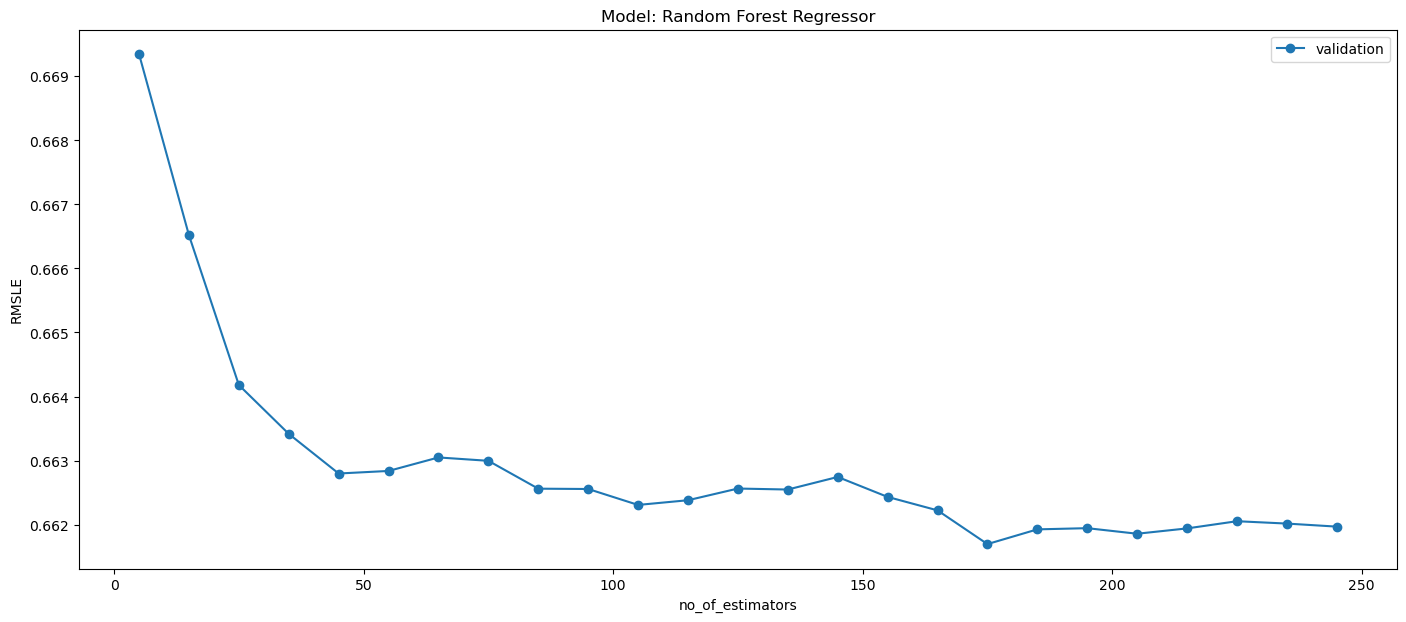

In [17]:
plt.figure(figsize=(17,7))
plt.plot(x['estimator'], x['rmsle_valid'], marker='o',label='validation');
plt.title('Model: Random Forest Regressor')
plt.ylabel('RMSLE')
plt.xlabel('no_of_estimators')
plt.legend();

---
### `N_ESTIMATORS = 175`
---

The `RMSLE` is lowest on `n_estimators` value `175` is around 0.667 and seems to get stable after that. So, we will keep the value of the n_estimators = 175.



---

### `OPTIMUM VALUE OF MAX_DEPTH` 
---

Now, we will keep the value of `n_estimators` fixed as `175` and try different values of max_depth from 1, 2, ...29.

---

In [18]:
depth_results = []
data = merged_data.drop(columns=['STORE_NUM', 'UPC'])


valid_df = validation_df(merged_data, week, no_of_months=2, no_of_validation= 14)
for depth in tqdm_notebook(range(1,30,1), leave=True, desc= 'max_depth'):    
    result = {}

    model_RFR = RandomForestRegressor(max_depth=depth,n_estimators=175)

    rmsle_train, rmsle_valid , data_train = train_model(valid_df, data, model_RFR)
    result['depth'] = depth
    result['rmsle_train'] = rmsle_train
    result['rmsle_valid'] = rmsle_valid
    depth_results.append(result)
    
get_colums(data_train)

max_depth:   0%|          | 0/29 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]


####### The model is trained on Following Columns: ###########

Index(['BASE_PRICE', 'FEATURE', 'DISPLAY', 'MANUFACTURER_1', 'MANUFACTURER_2',
       'MANUFACTURER_3', 'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6',
       'MANUFACTURER_7', 'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1',
       'SUB_CATEGORY_2', 'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5',
       'SUB_CATEGORY_6', 'SUB_CATEGORY_7', 'PRODUCT_SIZE'],
      dtype='object')


In [19]:
x = pd.DataFrame.from_dict(depth_results)

In [20]:
x

,depth,rmsle_train,rmsle_valid
0,1,0.934441,0.937124
1,2,0.824833,0.832998
2,3,0.750699,0.765958
3,4,0.708305,0.729855
4,5,0.668954,0.700318
5,6,0.643219,0.688599
6,7,0.623417,0.675631
7,8,0.605171,0.665758
8,9,0.591613,0.661078
9,10,0.580008,0.656759


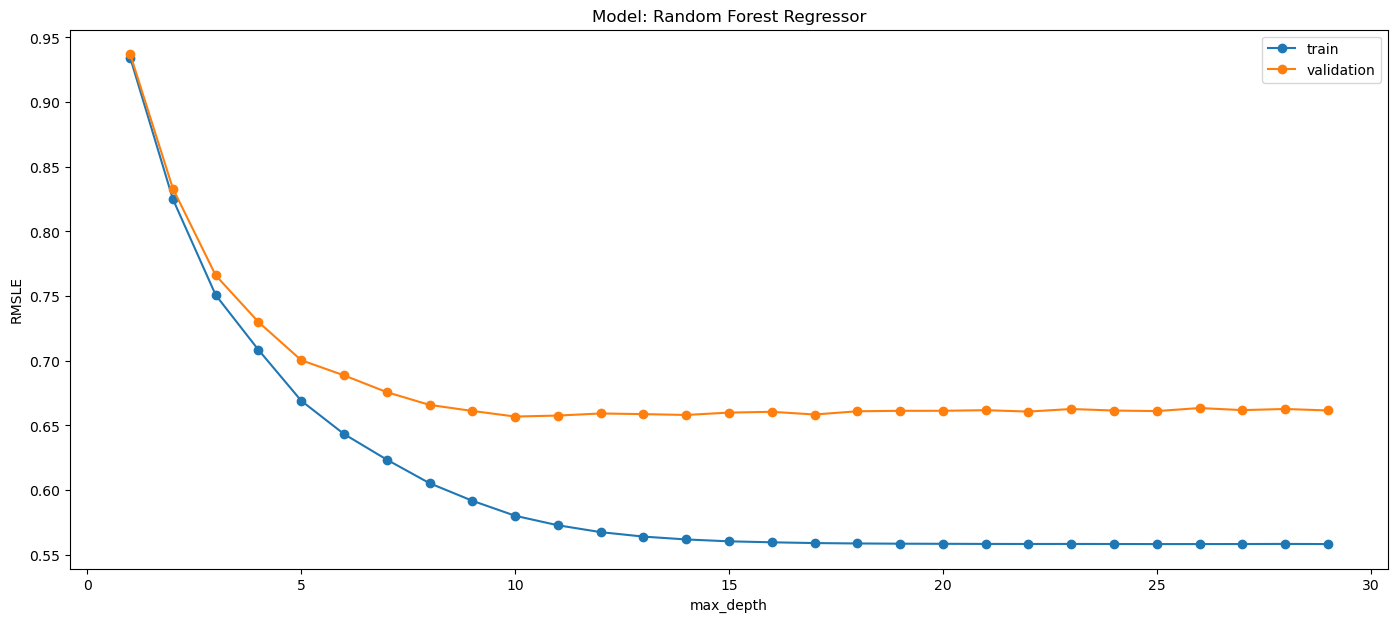

In [21]:

plt.figure(figsize=(17,7))
plt.plot(x['depth'], x['rmsle_train'], marker='o',label='train');
plt.plot(x['depth'], x['rmsle_valid'], marker='o',label='validation');
plt.title('Model: Random Forest Regressor')
plt.ylabel('RMSLE')
plt.xlabel('max_depth')
plt.legend();

### `MAX_DEPTH = 10`

The RMSLE gets stable on both validation and train set after max_depth 10 and the RMSLE is still around 0.67

---
---

### `ADD TIME BASED FEATURES`

- Now, we will add some Time based features to the data like year of the transaction, month, day, day_of_year, week, quarter.

- And we will once again check the performace of the model for different max_depth 1 to 29 and will decide whether we have selected the right value of max_depth or not. 



---

In [22]:
# year
merged_data['year']  = merged_data['WEEK_END_DATE'].dt.year
# month
merged_data['month'] = merged_data['WEEK_END_DATE'].dt.month
# day
merged_data['day'] = merged_data['WEEK_END_DATE'].dt.day
# day_of year
merged_data['day_of_year'] = merged_data['WEEK_END_DATE'].dt.dayofyear
# week 
merged_data["week"] = merged_data['WEEK_END_DATE'].dt.week
# quarter
merged_data["quarter"] = merged_data['WEEK_END_DATE'].dt.quarter

In [23]:
depth_results = []
data = merged_data.drop(columns=['STORE_NUM', 'UPC'])

valid_df = validation_df(merged_data, week, no_of_months=2, no_of_validation= 14)
for depth in tqdm_notebook(range(1,16,1), desc='max_depth', leave=True):    
    result = {}

    model_RFR = RandomForestRegressor(max_depth= depth, n_estimators= 175)

    rmsle_train, rmsle_valid, data_train = train_model(valid_df, data, model_RFR)
    result['depth'] = depth
    result['rmsle_train'] = rmsle_train
    result['rmsle_valid'] = rmsle_valid
    depth_results.append(result)
    
get_colums(data_train)

max_depth:   0%|          | 0/15 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

training_model:   0%|          | 0/14 [00:00<?, ?it/s]


####### The model is trained on Following Columns: ###########

Index(['BASE_PRICE', 'FEATURE', 'DISPLAY', 'MANUFACTURER_1', 'MANUFACTURER_2',
       'MANUFACTURER_3', 'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6',
       'MANUFACTURER_7', 'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1',
       'SUB_CATEGORY_2', 'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5',
       'SUB_CATEGORY_6', 'SUB_CATEGORY_7', 'PRODUCT_SIZE', 'year', 'month',
       'day', 'day_of_year', 'week', 'quarter'],
      dtype='object')


In [24]:
x = pd.DataFrame.from_dict(depth_results)
x

,depth,rmsle_train,rmsle_valid
0,1,0.934187,0.936716
1,2,0.825335,0.834022
2,3,0.750937,0.766750
3,4,0.708816,0.732940
4,5,0.668563,0.702427
5,6,0.640249,0.693084
6,7,0.617120,0.682737
7,8,0.596306,0.673266
8,9,0.577701,0.669325
9,10,0.559750,0.666427


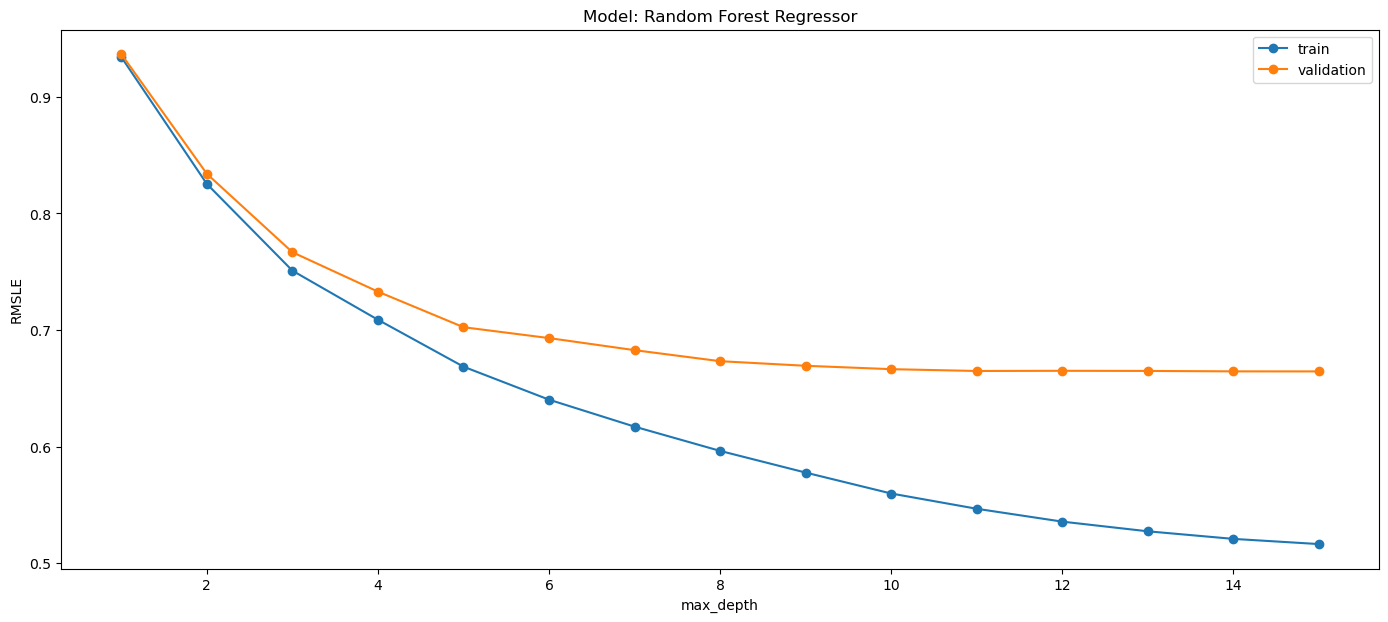

In [25]:
x = pd.DataFrame.from_dict(depth_results)
plt.figure(figsize=(17,7))
plt.plot(x['depth'], x['rmsle_train'], marker='o',label='train');
plt.plot(x['depth'], x['rmsle_valid'], marker='o',label='validation');
plt.title('Model: Random Forest Regressor')
plt.ylabel('RMSLE')
plt.xlabel('max_depth')
plt.legend();

---
---

***So, we can still see that the value of RMSLE on both train and validation set is getting stable after the max_depth 10. Now, we will keep on adding the new features to the data and check if it is improving the results or not.*** 



- `max_depth` : 10
- `no_of_estimators` : 175


---
---

## `NEW FEATURES`


---

 - `FOR EACH STORE_ID WE WILL FIND`
 
  - **UNIQUE NUMBER OF MANUFACTURERS**
       - For, each of the stores we will find out the number of unique number of manufactures as a feature. We are assumuing that more number of manufactures will give more options to the customers and will impact the sales.
       - We will have to use the original `train_data` and `product_data` to calculate this as we have encoded this feature during the pre-processing step.
  - **UNIQUE NUMBER OF CATEGORY AND SUB_CATEGORIES THEY HAVE**    
      - Similarly, we will find out the unique number of categories and sub categories that a particular store has.
     
     
---

In [26]:
# read the columns 'STORE_NUM' and 'UPC' from the train data
original_train_data = pd.read_csv('dataset/train.csv', usecols= ['STORE_NUM','UPC'])

In [27]:
# read the original product_data
original_product_data = pd.read_csv('dataset/product_data.csv')

In [28]:
original_product_data.head(5)

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [29]:
# merge the train and product data
original_train_data = original_train_data.merge(original_product_data, how='left',on = 'UPC')

In [30]:
# Now, we will create another dataframe unique_store_data
# We will group the data by STORE_NUM and find unique values of the features 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY'

unique_store_data = original_train_data.groupby(['STORE_NUM'])['MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY'].nunique().reset_index()

In [31]:
# rename the columns of the dataframe 'unique_store_data'
unique_store_data.columns = ['STORE_NUM', 'U_MANUFACTURER', 'U_CATEGORY', 'U_SUB_CATEGORY']

In [32]:
# now , merge this new dataframe with the dataframe that has all the features.
data_with_unique_store = merged_data.merge(unique_store_data, how= 'left', on= 'STORE_NUM')

In [33]:
# let's have a look at the data 
data_with_unique_store.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,...,PRODUCT_SIZE,year,month,day,day_of_year,week,quarter,U_MANUFACTURER,U_CATEGORY,U_SUB_CATEGORY
0,2009-01-14,367,1111009477,1.57,0,0,13,1,0,0,...,2,2009,1,14,14,3,1,4,3,5
1,2009-01-14,367,1111009497,1.39,0,0,20,1,0,0,...,2,2009,1,14,14,3,1,4,3,5
2,2009-01-14,367,1111085319,1.88,0,0,14,1,0,0,...,1,2009,1,14,14,3,1,4,3,5
3,2009-01-14,367,1111085345,1.88,0,0,29,1,0,0,...,3,2009,1,14,14,3,1,4,3,5
4,2009-01-14,367,1111085350,1.98,0,0,35,1,0,0,...,3,2009,1,14,14,3,1,4,3,5


In [34]:
# train a model with the new features.
model_RFR = RandomForestRegressor(max_depth=10, n_estimators=175)
new_data = data_with_unique_store.drop(columns=['STORE_NUM', 'UPC'])

valid_df = validation_df(new_data, week, no_of_months=2, no_of_validation= 14)

rmsle_train, rmsle_valid, data_train = train_model(valid_df, new_data, model_RFR)

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

In [36]:
print('RMSLE on train set: ', rmsle_train)
print('RMSLE on validation set:', rmsle_valid)

RMSLE on train set:  0.49511949746336087
RMSLE on validation set: 0.6005145046951468


In [35]:
data_train.columns

Index(['BASE_PRICE', 'FEATURE', 'DISPLAY', 'MANUFACTURER_1', 'MANUFACTURER_2',
       'MANUFACTURER_3', 'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6',
       'MANUFACTURER_7', 'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1',
       'SUB_CATEGORY_2', 'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5',
       'SUB_CATEGORY_6', 'SUB_CATEGORY_7', 'PRODUCT_SIZE', 'year', 'month',
       'day', 'day_of_year', 'week', 'quarter', 'U_MANUFACTURER', 'U_CATEGORY',
       'U_SUB_CATEGORY'],
      dtype='object')

---

***Here, we can see that there is significant improvement in the model performance. On the validation set RMSLE is now `0.600`***

---

---
---

### `GET LAG FEATURES`


Now, we will create the lag features, which will be the number of units ordered of the same product from the same store at exactly one year ago.

---

In [36]:
# define a function that will return calculate the units sold number of a particular product from a particular store.
# We need to calculate this for 52 Weeks or 1 Year

def get_lag_feature(data, no_of_week=1, return_Series= False):
    data_copy = data.copy()
    sample_1 = data_copy[['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS']]
    data_copy['NEW_DATE'] = data_copy.WEEK_END_DATE + timedelta(days = no_of_week*7)
    data_copy['PAST_DATE'] = data_copy.WEEK_END_DATE
    
    sample_2 = data_copy[['NEW_DATE','PAST_DATE', 'STORE_NUM', 'UPC', 'UNITS']]
    final = sample_1.merge(sample_2, how = 'left', left_on = ['WEEK_END_DATE', 'STORE_NUM', 'UPC'], right_on = ['NEW_DATE', 'STORE_NUM', 'UPC'])
    final = final.drop(columns=['NEW_DATE'])
    final.fillna(0,inplace = True)
    
    if return_Series:
        return final['UNITS_y']
    else: return final

In [37]:
# Let's verify the function is correct or not.
# In the following dataframe, We have UNITS_x as the units sold on the transaction data
# In the following dataframe, We have UNITS_y as the units sold on the PAST_DATE

get_lag_feature(merged_data, no_of_week = 8)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS_x,PAST_DATE,UNITS_y
0,2009-01-14,367,1111009477,13,0,0.0
1,2009-01-14,367,1111009497,20,0,0.0
2,2009-01-14,367,1111085319,14,0,0.0
3,2009-01-14,367,1111085345,29,0,0.0
4,2009-01-14,367,1111085350,35,0,0.0
...,...,...,...,...,...,...
232261,2011-09-28,29159,7192100336,32,2011-08-03 00:00:00,16.0
232262,2011-09-28,29159,7192100337,31,2011-08-03 00:00:00,10.0
232263,2011-09-28,29159,7192100339,23,2011-08-03 00:00:00,13.0
232264,2011-09-28,29159,7797502248,8,2011-08-03 00:00:00,7.0


In [38]:
# let's see the last third row of the dataframe
merged_data.loc[(merged_data.WEEK_END_DATE == '2011-09-28') & (merged_data.STORE_NUM == 29159) & (merged_data.UPC == 7192100339), 'UNITS']

232263    23
Name: UNITS, dtype: int64

In [39]:
merged_data.loc[(merged_data.WEEK_END_DATE == '2011-08-03') & (merged_data.STORE_NUM == 29159) & (merged_data.UPC == 7192100339), 'UNITS']

219173    13
Name: UNITS, dtype: int64

---

In [40]:
#  create a feature UNITS BEFORE 52_WEEK
data_with_unique_store['UNITS_BEFORE_52WEEK'] = get_lag_feature(data_with_unique_store, no_of_week= 52, return_Series= True)

In [41]:
# train the model with the new feature

model_RFR = RandomForestRegressor(max_depth=10, n_estimators=175)

new_data = data_with_unique_store.drop(columns= ['STORE_NUM', 'UPC'])
valid_df = validation_df(new_data, week, no_of_months=2, no_of_validation= 14)

rmsle_train, rmsle_valid, data_train = train_model(valid_df, new_data, model_RFR)

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

In [42]:
# mean RMSLE on train and validation set
print('RMSLE on train set: ', rmsle_train)
print('RMSLE on validation set:', rmsle_valid)

RMSLE on train set:  0.42436251872070674
RMSLE on validation set: 0.5847441584640709


In [43]:
# columns on the updated data.
data_train.columns

Index(['BASE_PRICE', 'FEATURE', 'DISPLAY', 'MANUFACTURER_1', 'MANUFACTURER_2',
       'MANUFACTURER_3', 'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6',
       'MANUFACTURER_7', 'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1',
       'SUB_CATEGORY_2', 'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5',
       'SUB_CATEGORY_6', 'SUB_CATEGORY_7', 'PRODUCT_SIZE', 'year', 'month',
       'day', 'day_of_year', 'week', 'quarter', 'U_MANUFACTURER', 'U_CATEGORY',
       'U_SUB_CATEGORY', 'UNITS_BEFORE_52WEEK'],
      dtype='object')

---

***We can see a slight improvement in the RMSLE on the validaiton set. It is `0.585` now***

---

---

### `DIFFERENCE IN PRICE FROM LAST WEEK`

This will be our new feature. Whether the increase/decrease in price from the last week makes any difference to the model or not. 


---

In [44]:
# get the price difference
data_with_unique_store['price_difference'] = data_with_unique_store['BASE_PRICE'] - data_with_unique_store.groupby(['STORE_NUM', 'UPC'])['BASE_PRICE'].shift(1)

In [45]:
# let's verify we have calculated the right price difference or not
data_with_unique_store.loc[(data_with_unique_store.STORE_NUM == 367) & (data_with_unique_store.UPC == 1111009477),['STORE_NUM', 'UPC', 'BASE_PRICE', 'price_difference','UNITS']].head(10)

,STORE_NUM,UPC,BASE_PRICE,price_difference,UNITS
0,367,1111009477,1.57,NaN,13
1640,367,1111009477,1.57,0.00,24
3276,367,1111009477,1.36,-0.21,7
4912,367,1111009477,1.38,0.02,12
6552,367,1111009477,1.50,0.12,16
8179,367,1111009477,1.49,-0.01,21
9814,367,1111009477,1.49,0.00,11
11427,367,1111009477,1.49,0.00,10
13040,367,1111009477,1.39,-0.10,13
14677,367,1111009477,1.48,0.09,13


In [46]:
# fill the null values in the price difference with 0
data_with_unique_store.price_difference.fillna(0,inplace=True)

In [47]:
model_RFR = RandomForestRegressor(max_depth=10, n_estimators=175)

new_data = data_with_unique_store.drop(columns=['STORE_NUM', 'UPC'])

valid_df = validation_df(new_data, week, no_of_months= 2, no_of_validation= 14)

rmsle_train, rmsle_valid, data_train = train_model(valid_df, new_data, model_RFR)

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

In [48]:
print('RMSLE on train set: ', rmsle_train)
print('RMSLE on validation set:', rmsle_valid)

RMSLE on train set:  0.4246771694048478
RMSLE on validation set: 0.5843821252838144


In [49]:
data_train.columns

Index(['BASE_PRICE', 'FEATURE', 'DISPLAY', 'MANUFACTURER_1', 'MANUFACTURER_2',
       'MANUFACTURER_3', 'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6',
       'MANUFACTURER_7', 'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1',
       'SUB_CATEGORY_2', 'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5',
       'SUB_CATEGORY_6', 'SUB_CATEGORY_7', 'PRODUCT_SIZE', 'year', 'month',
       'day', 'day_of_year', 'week', 'quarter', 'U_MANUFACTURER', 'U_CATEGORY',
       'U_SUB_CATEGORY', 'UNITS_BEFORE_52WEEK', 'price_difference'],
      dtype='object')

---

The performance of the model has not changed. It is same as before.

----
---

### `AVERAGE BEFORE 2 MONTH`

- As we have one week gap between the training period and the validation set so for each store and product combination we will calculate the average units sold in 2 months before 1 week.
- In simple terms, the average number of units sold from 7 days to 63 days ago
- Let's see is this feature useful to us or not.

---

In [50]:
# make 2 columns one with 63 days difference from the week end date and another with 7 days difference
data_with_unique_store['2_MONTH_BEFORE'] = data_with_unique_store.WEEK_END_DATE - timedelta(days=63)
data_with_unique_store['1_WEEK_BEFORE'] = data_with_unique_store.WEEK_END_DATE - timedelta(days=7)

In [51]:
data_with_unique_store[['WEEK_END_DATE', '2_MONTH_BEFORE', '1_WEEK_BEFORE']].tail()

,WEEK_END_DATE,2_MONTH_BEFORE,1_WEEK_BEFORE
232261,2011-09-28,2011-07-27,2011-09-21
232262,2011-09-28,2011-07-27,2011-09-21
232263,2011-09-28,2011-07-27,2011-09-21
232264,2011-09-28,2011-07-27,2011-09-21
232265,2011-09-28,2011-07-27,2011-09-21


In [52]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
# calculate the average units in the period
def get_average_units(x):
    data_2month = data_with_unique_store[(data_with_unique_store.WEEK_END_DATE <= x['1_WEEK_BEFORE']) & (data_with_unique_store['WEEK_END_DATE'] >= x['2_MONTH_BEFORE']) & (data_with_unique_store['STORE_NUM'] == x['STORE_NUM']) & (data_with_unique_store['UPC'] == x['UPC']) ]
    return data_2month.UNITS.mean() 

In [53]:
data_with_unique_store['AVERAGE_UNITS_IN_2_MONTH'] = data_with_unique_store.progress_apply(get_average_units,axis=1)

  0%|          | 0/232266 [00:00<?, ?it/s]

In [54]:
# fill the null values with 0
data_with_unique_store.AVERAGE_UNITS_IN_2_MONTH.fillna(0,inplace=True)

In [55]:
# drop the date columns that we have created, as they are of no use now.
new_data = data_with_unique_store.drop(columns=['2_MONTH_BEFORE','1_WEEK_BEFORE', 'STORE_NUM', 'UPC'])

In [ ]:
model_RFR = RandomForestRegressor(max_depth=10, n_estimators=175)

valid_df = validation_df(new_data, week, no_of_months=2, no_of_validation= 14)

rmsle_train, rmsle_valid, data_train = train_model(valid_df,new_data, model_RFR)

training_model:   0%|          | 0/14 [00:00<?, ?it/s]

In [59]:
print('RMSLE on train set: ', rmsle_train)
print('RMSLE on validation set:', rmsle_valid)

RMSLE on train set:  0.34892231290209125
RMSLE on validation set: 0.467263616982177


In [60]:
data_train.columns

Index(['BASE_PRICE', 'FEATURE', 'DISPLAY', 'MANUFACTURER_1', 'MANUFACTURER_2',
       'MANUFACTURER_3', 'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6',
       'MANUFACTURER_7', 'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1',
       'SUB_CATEGORY_2', 'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5',
       'SUB_CATEGORY_6', 'SUB_CATEGORY_7', 'PRODUCT_SIZE', 'year', 'month',
       'day', 'day_of_year', 'week', 'quarter', 'U_MANUFACTURER', 'U_CATEGORY',
       'U_SUB_CATEGORY', 'UNITS_BEFORE_52WEEK', 'price_difference',
       'AVERAGE_UNITS_IN_2_MONTH'],
      dtype='object')

---

- The last feature that we added has made significant improvement in the RMSLE score on the validation data.
- The RMSLE is now `0.4677`

In [61]:
data_with_unique_store.to_csv('final_data.csv',index=False)

---

- ***`Try out some more features that you can think of.`*** 
- ***`Let us know in the Discussions whether they have improved the score or not.`***

---